In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root = 'data/', download=True)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

5


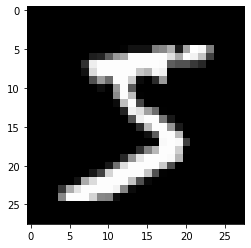

In [4]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print(label)
plt.show()

In [5]:
import torchvision.transforms as transforms

In [6]:
dataset = MNIST(root='data/',
                train=True,
                transform=transforms.ToTensor())

In [7]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [8]:
print(img_tensor[:, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


In [9]:
import numpy as np

def split_indicies(n, val_pct):
    n_val = int(val_pct*n)
    idxs = np.random.permutation(n)
    return idxs[n_val:], idxs[:n_val]

In [10]:
train_indicies, val_indicies = split_indicies(len(dataset), val_pct=0.2)

In [11]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [12]:
batch_size = 100

train_sampler = SubsetRandomSampler(train_indicies)
train_loader = DataLoader(dataset,
                          batch_size,
                          sampler=train_sampler)
val_sampler = SubsetRandomSampler(val_indicies)
val_loader = DataLoader(dataset, 
                        batch_size,
                        sampler=val_sampler)

In [13]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

model = nn.Linear(input_size, num_classes)

In [14]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0244, -0.0151, -0.0169,  ...,  0.0228,  0.0053,  0.0314],
        [ 0.0244, -0.0089,  0.0242,  ...,  0.0001, -0.0127,  0.0134],
        [-0.0154,  0.0163, -0.0218,  ..., -0.0084, -0.0233,  0.0346],
        ...,
        [-0.0084, -0.0290,  0.0131,  ...,  0.0353,  0.0090,  0.0325],
        [-0.0286,  0.0002, -0.0068,  ...,  0.0349, -0.0275, -0.0193],
        [ 0.0345,  0.0191, -0.0054,  ...,  0.0081,  0.0139,  0.0044]],
       requires_grad=True)

In [15]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0040,  0.0069, -0.0299,  0.0106, -0.0226, -0.0189, -0.0080,  0.0022,
        -0.0107, -0.0047], requires_grad=True)

In [16]:
# Error
# for images, labels in train_loader:
#     print(labels)
#     print(images)
#     outputs = model(images)
#     break

In [17]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

model = MnistModel()

In [18]:
for images, labels in val_loader:
    outputs = model(images)
    break

print(f'outputs.shape: {outputs.shape}')
print(f"Sample outputs: {outputs[:2].data}")

outputs.shape: torch.Size([100, 10])
Sample outputs: tensor([[-0.2697,  0.3324, -0.3423, -0.4523, -0.0973,  0.1068, -0.1093,  0.1602,
          0.4132, -0.3503],
        [-0.2239,  0.0020,  0.0448, -0.0038, -0.0907, -0.0242, -0.0799,  0.1669,
         -0.1343, -0.0625]])


In [19]:
import torch.nn.functional as F

In [20]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0778, 0.1421, 0.0724, 0.0648, 0.0925, 0.1134, 0.0914, 0.1196, 0.1541,
         0.0718],
        [0.0828, 0.1038, 0.1084, 0.1032, 0.0946, 0.1011, 0.0957, 0.1224, 0.0906,
         0.0973]])
Sum:  1.0


In [21]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([8, 7, 9, 7, 9, 8, 1, 2, 8, 9, 1, 3, 1, 1, 2, 7, 0, 7, 1, 5, 3, 5, 3, 3,
        1, 7, 2, 1, 1, 7, 0, 1, 1, 6, 5, 1, 9, 5, 1, 9, 1, 6, 5, 4, 5, 2, 7, 1,
        2, 1, 7, 1, 3, 0, 1, 1, 9, 1, 5, 1, 9, 5, 7, 2, 6, 8, 7, 3, 1, 1, 1, 7,
        7, 1, 5, 1, 7, 1, 3, 1, 7, 9, 8, 2, 5, 8, 6, 2, 1, 7, 5, 6, 8, 3, 3, 7,
        1, 8, 0, 3])
tensor([0.1541, 0.1224, 0.1284, 0.1267, 0.1310, 0.1211, 0.1303, 0.1132, 0.1191,
        0.1479, 0.1275, 0.1273, 0.1463, 0.1124, 0.1390, 0.1376, 0.1062, 0.1191,
        0.1343, 0.1546, 0.1198, 0.1293, 0.1260, 0.1239, 0.1371, 0.1233, 0.1114,
        0.1428, 0.1241, 0.1200, 0.1172, 0.1460, 0.1397, 0.1304, 0.1530, 0.1334,
        0.1392, 0.1154, 0.1427, 0.1259, 0.1263, 0.1269, 0.1306, 0.1174, 0.1206,
        0.1471, 0.1165, 0.1390, 0.1262, 0.1172, 0.1314, 0.1397, 0.1193, 0.1178,
        0.1216, 0.1180, 0.1191, 0.1176, 0.1291, 0.1409, 0.1278, 0.1331, 0.1254,
        0.1353, 0.1318, 0.1277, 0.1222, 0.1222, 0.1348, 0.1191, 0.1127, 0.1161,
        0.1268, 0.1

In [22]:
labels

tensor([2, 1, 0, 7, 3, 1, 8, 4, 7, 0, 6, 7, 7, 1, 4, 8, 1, 1, 0, 6, 9, 6, 3, 6,
        2, 1, 4, 4, 9, 1, 5, 2, 9, 0, 0, 7, 9, 4, 4, 6, 2, 7, 3, 5, 6, 2, 1, 8,
        6, 3, 7, 5, 4, 1, 9, 7, 6, 0, 0, 9, 9, 2, 7, 0, 3, 2, 9, 3, 7, 9, 7, 1,
        1, 9, 0, 3, 1, 4, 7, 5, 5, 1, 5, 9, 2, 1, 5, 6, 9, 8, 6, 5, 2, 7, 7, 7,
        4, 2, 2, 5])

In [23]:
torch.sum(preds == labels)

tensor(10)

In [24]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [25]:
accuracy(outputs, labels)

tensor(0.1000)

In [26]:
loss_fn = F.cross_entropy

In [27]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3208, grad_fn=<NllLossBackward>)


In [28]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [29]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):
    preds = model(xb)
    loss = loss_fn(preds, yb)
    
    if opt is not None:
        # Computer Gradients
        loss.backward() 
        # Update Parameters
        opt.step()
        # Reset gradients
        opt.zero_grad()
    
    metric_result = None
    if metric is not None:
        metric_result = metric(preds, yb)
    
    return loss.item(), len(xb), metric_result

In [30]:
def evaluate(model, loss_fn, valid_dl, metric=None):
    with torch.no_grad():
        # pass each batch through the model
        results = [loss_batch(model, loss_fn, xb, yb, metric=metric)
                      for xb, yb in valid_dl]
        # Separate losses, counts, and metrics
        losses, nums, metrics = zip(*results)
        # Total size of the dataset
        total = np.sum(nums)
        # Avg. loss across batches
        avg_loss = np.sum(np.multiply(losses, nums)) / total
        avg_metric = None
        if metric is not None:
            avg_metric = np.sum(np.multiply(metrics, nums)) / total
    return avg_loss, total, avg_metric         

In [31]:
val_loss, total, val_acc = evaluate(model, loss_fn, val_loader, metric=accuracy)
print(f"Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}")

Loss: 2.3164, Accuracy: 0.0767


In [32]:
def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric=None):
    for epoch in range(epochs):
        # Training
        for xb, yb in train_dl:
            loss, _, _ = loss_batch(model, loss_fn, xb, yb, opt=opt)
        
        # Evaluation
        for xb, yb in valid_dl:
            result = evaluate(model, loss_fn, valid_dl, metric)
            val_loss, total, val_metric = result
        
        if metric is None:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {val_loss:.4f}")
        else:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {val_loss:.4f} {metric.__name__}: {val_metric:.4f}")

In [33]:
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [34]:
fit(5, model, F.cross_entropy, opt=optimizer, train_dl=train_loader, valid_dl=val_loader, metric=accuracy)

Epoch 1/5, Loss: 1.9062 accuracy: 0.6458
Epoch 2/5, Loss: 1.5992 accuracy: 0.7465
Epoch 3/5, Loss: 1.3833 accuracy: 0.7798
Epoch 4/5, Loss: 1.2282 accuracy: 0.7960
Epoch 5/5, Loss: 1.1133 accuracy: 0.8082


In [35]:
fit(5, model, F.cross_entropy, opt=optimizer, train_dl=train_loader, valid_dl=val_loader, metric=accuracy)

Epoch 1/5, Loss: 1.0257 accuracy: 0.8169
Epoch 2/5, Loss: 0.9569 accuracy: 0.8222
Epoch 3/5, Loss: 0.9016 accuracy: 0.8270
Epoch 4/5, Loss: 0.8561 accuracy: 0.8311
Epoch 5/5, Loss: 0.8180 accuracy: 0.8355


In [36]:
test_dataset = MNIST(root='data/',
                     train=False,
                     transform=transforms.ToTensor())

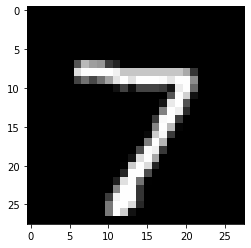

7


In [37]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
plt.show()
print(label)

In [38]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [39]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7, Predicted: 7


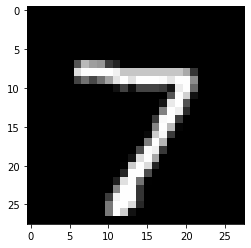

In [40]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print(f'Label: {label}, Predicted: {predict_image(img, model)}')

Label: 2, Predicted: 2


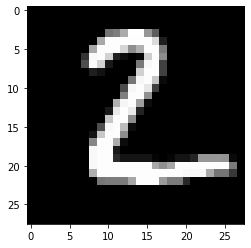

In [41]:
img, label = test_dataset[1]
plt.imshow(img[0], cmap='gray')
print(f'Label: {label}, Predicted: {predict_image(img, model)}')

Label: 1, Predicted: 1


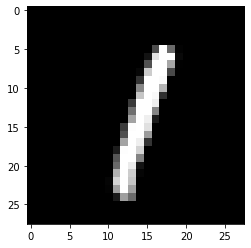

In [42]:
img, label = test_dataset[5]
plt.imshow(img[0], cmap='gray')
print(f'Label: {label}, Predicted: {predict_image(img, model)}')

Label: 2, Predicted: 8


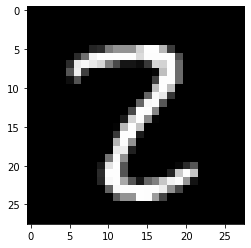

In [43]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print(f'Label: {label}, Predicted: {predict_image(img, model)}')

In [44]:
test_loader = DataLoader(test_dataset, batch_size=200)
val_loss, total, val_acc = evaluate(model, loss_fn, test_loader, metric=accuracy)
print(f"Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}")

Loss: 0.7915, Accuracy: 0.8483


In [45]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [46]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-3.4975e-03,  5.6631e-03,  1.6033e-02,  ..., -1.4569e-02,
                       -1.6608e-02, -8.6430e-03],
                      [ 1.7014e-02,  2.2049e-02,  1.5251e-02,  ...,  2.0692e-02,
                        6.2854e-03,  2.1227e-02],
                      [-1.2499e-02, -4.4005e-03, -9.6199e-04,  ...,  2.9670e-03,
                       -3.3614e-02,  2.0172e-02],
                      ...,
                      [-3.2374e-03,  1.4135e-02, -3.5198e-02,  ..., -2.0383e-02,
                        2.5102e-02, -1.8934e-02],
                      [ 7.2593e-03, -1.5516e-02,  3.2304e-02,  ..., -7.4238e-05,
                       -1.3446e-03,  9.8358e-03],
                      [-3.2154e-02,  1.7934e-02,  1.9729e-02,  ..., -2.7322e-02,
                       -2.2114e-02, -2.0574e-02]])),
             ('linear.bias',
              tensor([-0.0462,  0.0842, -0.0239, -0.0034,  0.0014,  0.0046, -0.0281,  0.0044,
                      -0.0545,

In [47]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-3.4975e-03,  5.6631e-03,  1.6033e-02,  ..., -1.4569e-02,
                       -1.6608e-02, -8.6430e-03],
                      [ 1.7014e-02,  2.2049e-02,  1.5251e-02,  ...,  2.0692e-02,
                        6.2854e-03,  2.1227e-02],
                      [-1.2499e-02, -4.4005e-03, -9.6199e-04,  ...,  2.9670e-03,
                       -3.3614e-02,  2.0172e-02],
                      ...,
                      [-3.2374e-03,  1.4135e-02, -3.5198e-02,  ..., -2.0383e-02,
                        2.5102e-02, -1.8934e-02],
                      [ 7.2593e-03, -1.5516e-02,  3.2304e-02,  ..., -7.4238e-05,
                       -1.3446e-03,  9.8358e-03],
                      [-3.2154e-02,  1.7934e-02,  1.9729e-02,  ..., -2.7322e-02,
                       -2.2114e-02, -2.0574e-02]])),
             ('linear.bias',
              tensor([-0.0462,  0.0842, -0.0239, -0.0034,  0.0014,  0.0046, -0.0281,  0.0044,
                      -0.0545,

In [48]:
test_loader = DataLoader(test_dataset, batch_size=200)
val_loss, total, val_acc = evaluate(model2, loss_fn, test_loader, metric=accuracy)
print(f"Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}")

Loss: 0.7915, Accuracy: 0.8483
